In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler #Standardizasyon için
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: KNN ile ilgili en iyi parametreleri belirlemek
from sklearn.metrics import accuracy_score ,confusion_matrix #Sonuç değerlendirme
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor #Trainin algoritması ve NCA ve Outlier değerler için
from sklearn.decomposition import PCA #PCA için

In [2]:
data = pd.read_csv("C:\\Users\\home\\Desktop\\ml project\\diabetes.csv")
data.head(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
outcome1 = data[data.Outcome == 1]
outcome0 = data[data.Outcome == 0]

In [4]:
outcome0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [5]:
outcome1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


# Visualization

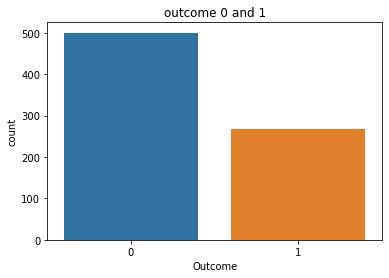

In [6]:
sns . countplot(x="Outcome", data=data)
plt.title("outcome 0 and 1")
plt.show()

In [7]:
data.shape

(768, 9)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


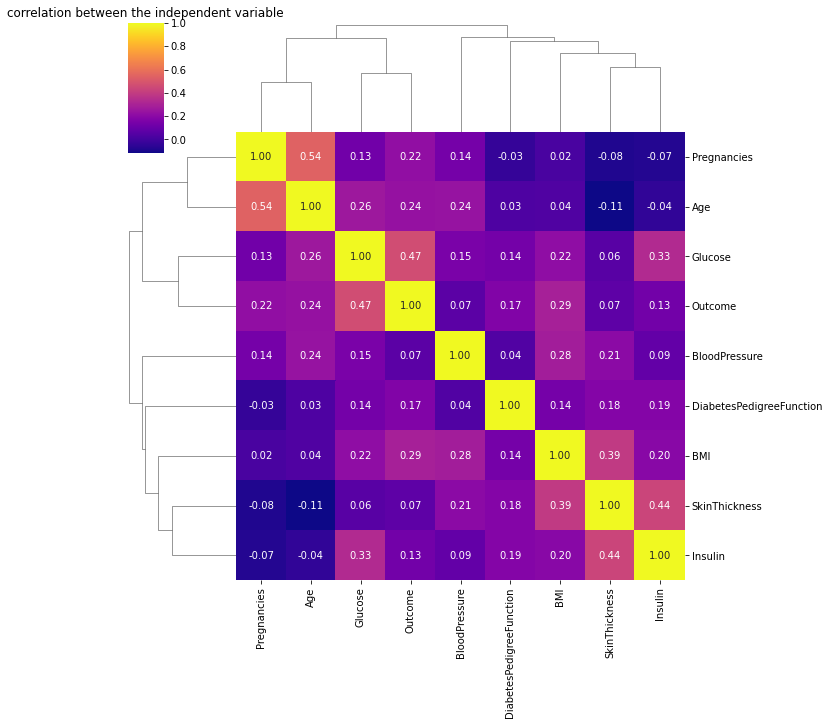

In [10]:
corr_data = data.corr()
sns.clustermap(corr_data, annot= True, cmap = "plasma", linecolor = "red",  fmt = '.2f')
plt.title("correlation between the independent variable")
plt.show();

# Feautre Visualization with Box plot [Before Standardization]

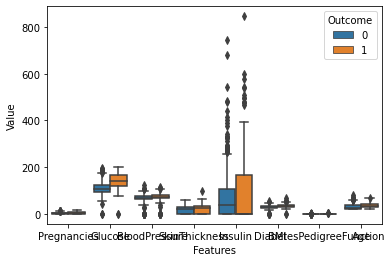

In [11]:
data_melted = pd.melt(data, id_vars='Outcome', var_name ='Features',value_name='Value')
plt.figure()
sns.boxplot(x= 'Features', y = 'Value', hue = 'Outcome', data = data_melted)
plt.show()


# Analysis of Diabetic Cases

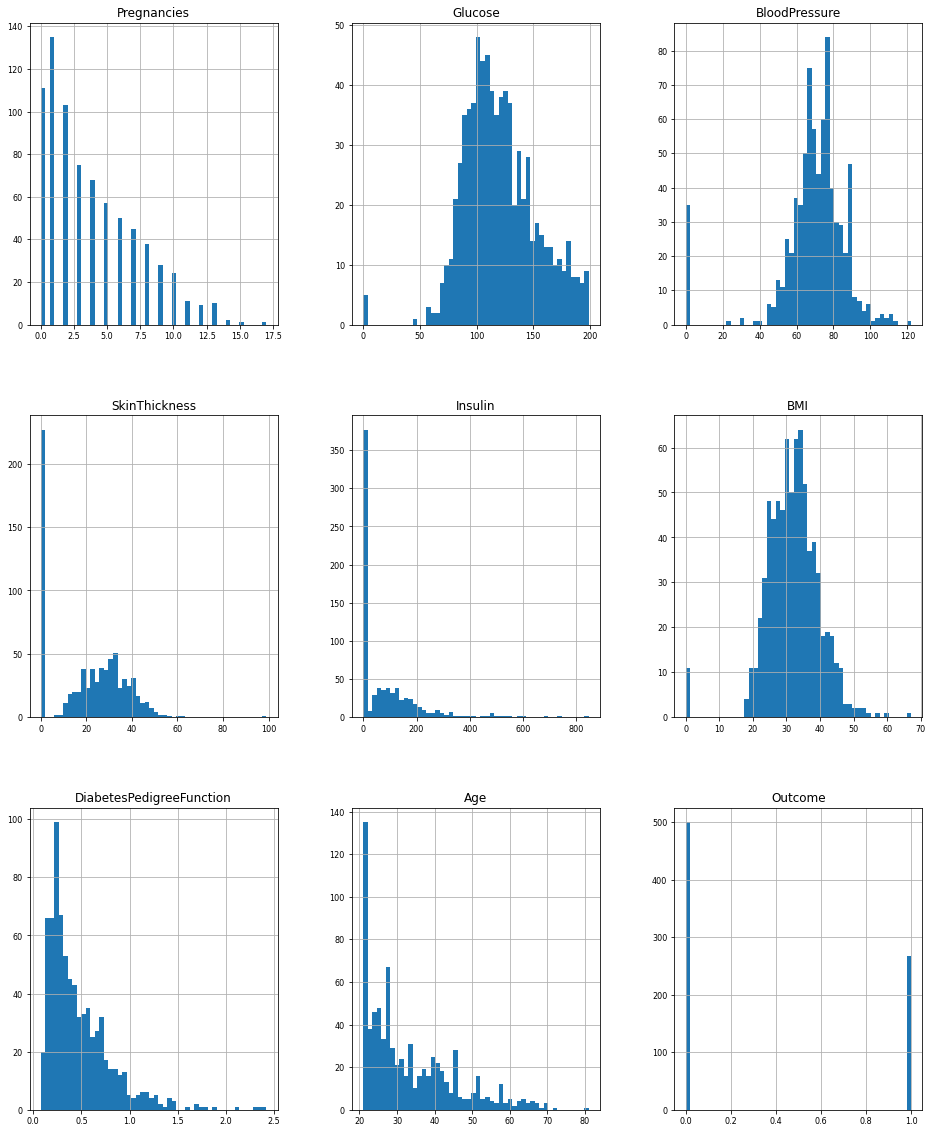

In [12]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


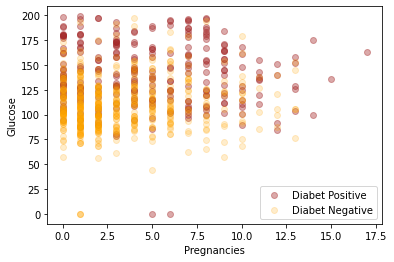

In [13]:
plt.scatter(outcome1.Pregnancies,outcome1.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(outcome0.Pregnancies,outcome0.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()


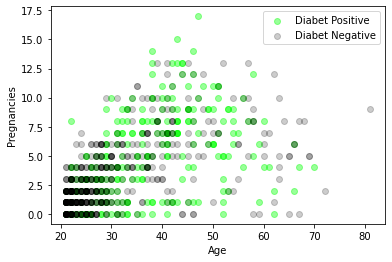

In [14]:
#Visualization, Scatter Plot

plt.scatter(outcome1.Age,outcome1.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(outcome0.Age,outcome0.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

#We appear that it is clear segregation.

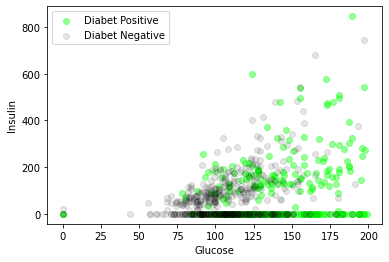

In [15]:
#Visualization, Scatter Plot

plt.scatter(outcome1.Glucose,outcome1.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(outcome0.Glucose,outcome0.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

#We appear that it is clear segregation

# Outlier Detection¶


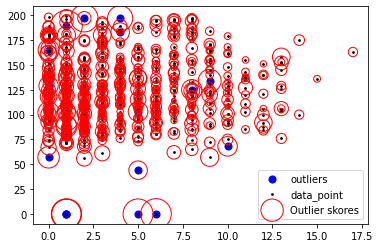

In [16]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist() # Featureların isimlerini bir listede topladık.

clf = LocalOutlierFactor() #KNN değeri gerekiyor. Tanımlı değeri 20 ve bizde 20 kullanacağız. O nedenle birşey yazmayacağız.
y_pred = clf.fit_predict(x) #LOF uygulayıo negetif outlier f. alıyoruz.

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist() #outlier değerlerine threshold uygulanmış olanları bir listeye attık

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point') #s : boyut

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) #Değerleri normalize ederek biası önledik
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();


# Drop Outliers

In [17]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

# Train - Tespt Split

In [18]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# Standardizasyon

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scaler isimli bir değişkene Standartscaler metodunu atayıp sonra bu değişken aracılığıyla xtraindeki verileri standardize ettik

x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

# Box Plot Visualization after the Standardization

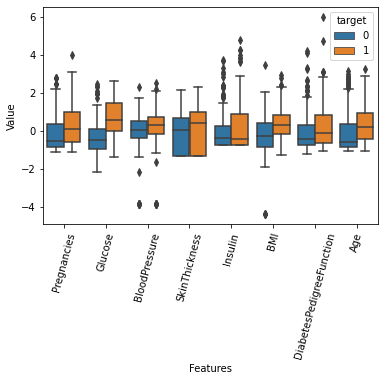

In [20]:
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()

# Comparison of ML Classification Algorithms

# Logistic Regression Classification

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

In [27]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)

Test Accuracy 0.8088888888888889


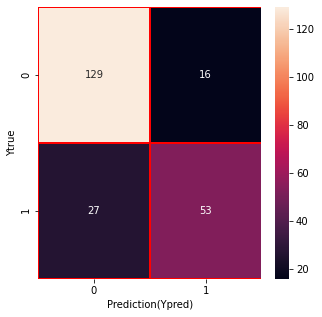

In [28]:
#Confusion Matrix

yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

# K-NN

In [30]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train) #Calculation (In the supervise learning this section = training)
y_predict = knn.predict(x_test) #Test Section
cm = confusion_matrix(y_test, y_predict) #Plooting
acc = accuracy_score(y_test, y_predict) #Accuracy Score
score = knn.score(x_test, y_test) #acc ile burasının sonucu aynı çıkacak. Doğrulama amaçlı yapılıyor.

print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)

Score: 0.7066666666666667
CM: [[135  10]
 [ 56  24]]
Basic KNN Acc: 0.7066666666666667


In [31]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,51)) #En uygun k değeri buluma
    weight_options = ['uniform','distance'] #En uygun weighti buluma
    #manhattan_distance = 1
    #euclidean_distance = 2
    distance_options = [1,2] #En uygun distance type buluma
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) #Aranacak parametreleri bir sözlükte topladık.

    knn =KNeighborsClassifier() #Parametrelerin deneneceği knn oluşturuldu.
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') #Parametrelerin aranması için method
    grid.fit(x_train, y_train) #fitting ile best parm. elde edildi
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) #Test setinde deneme işlemi için
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

In [32]:
grid = KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 0.7642235123367199 with parametres: {'n_neighbors': 36, 'p': 1, 'weights': 'distance'}

Test Score: 0.8177777777777778, Train Score: 1.0

CM Test: [[137   8]
 [ 33  47]]
CM Train: [[342   0]
 [  0 180]]


In [33]:
KNNscore = grid.best_score_

Text(0.5, 1.0, 'PCA: P1 Vs P2')

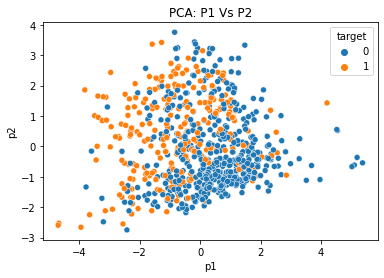

In [34]:
#%% PCA

scale = StandardScaler()
x_scaled = scaler.fit_transform(x) #x verisi bölünmeden tam bir şekilde PCA için scale edildi. 

pca = PCA(n_components=2) #2 componentli bir PCA oluşturduk.
pca.fit(x_scaled)
x_reduce_pca = pca.transform(x_scaled) #2feature'a yani boyuta düşürülmüş x 
pca_data =pd.DataFrame(x_reduce_pca,columns=['p1','p2']) #reduce datadan incelemek için bir dataframe oluşturuldu
pca_data['target'] = y #buna target eklendi. Görselleştirmek için gerekli.

sns.scatterplot(x='p1',y='p2',hue='target',data=pca_data) # targeta göre renklendirilmiş grafik
plt.title('PCA: P1 Vs P2')

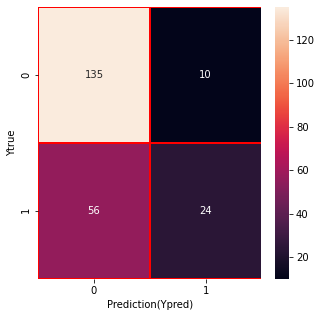

In [39]:
#Confusion Matrix

yprediciton2= knn.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

# SVM

In [40]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [41]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7412820512820513
Standart Deviation Accuracies:  0.03222565856288667


In [42]:
SVM.fit(x_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(x_test,y_test))

SVMscore = SVM.score(x_test,y_test)

SVM Accuracy: 0.7866666666666666


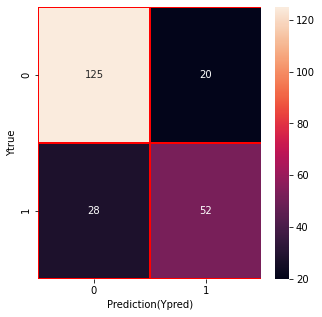

In [43]:
#Confusion Matrix

yprediciton3= SVM.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

# Naive Bayes Classification

In [44]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [45]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = NB, X= x_train, y=y_train, cv=35)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7549659863945577
Standart Deviation Accuracies:  0.11221677652262926


In [46]:
NB.fit(x_train,y_train) #learning
#prediction
print("Accuracy of NB Score: ", NB.score(x_test,y_test))

NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.7466666666666667


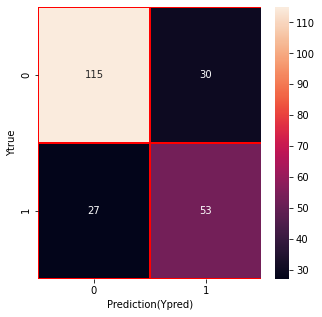

In [47]:
#Confusion Matrix

yprediciton4= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [48]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [ ]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= x_train, y=y_train, cv=55)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

In [49]:
DTC.fit(x_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test,y_test))
DTCscore = DTC.score(x_test,y_test)

Decision Tree Score:  0.6933333333333334


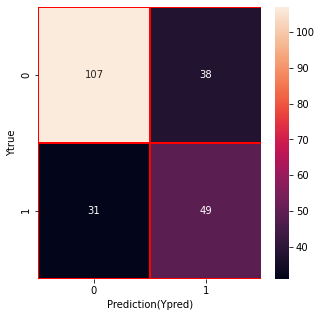

In [50]:
#Confusion Matrix

yprediciton5= DTC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton5)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42) #n_estimator = DT

In [53]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7663280116110305
Standart Deviation Accuracies:  0.06465725630236509


In [54]:
RFC.fit(x_train,y_train) # learning
print("Random Forest Score: ",RFC.score(x_test,y_test))
RFCscore=RFC.score(x_test,y_test)

Random Forest Score:  0.8177777777777778


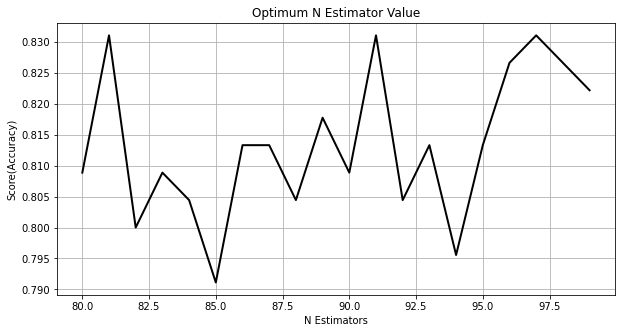

In [55]:
#Find Optimum K value
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

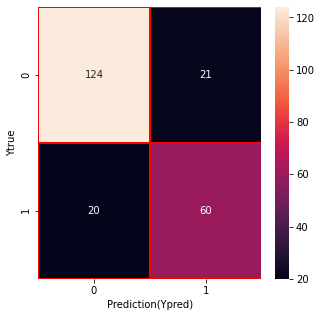

In [56]:
#Confusion Matrix

yprediciton6= RFC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton6)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

# ML Algorithms F1-Scores

In [57]:
#F1-Score For Logistic Regression
from sklearn.metrics import f1_score
LRf1 = f1_score(ytrue, yprediciton1, average='weighted') 
LRf1

0.8053265153936294

In [58]:
#K-NN
KNNf1= f1_score(ytrue, yprediciton2, average='weighted') 
KNNf1

0.6675647451963242

In [59]:
#SVM
SVMf1=f1_score(ytrue, yprediciton3, average='weighted') 
SVMf1

0.7839161662545626

In [60]:
#naive bayes
NBf1 = f1_score(ytrue, yprediciton4, average='weighted') 
NBf1

0.7476739131983782

In [61]:
#Decision Tree
DTf1=f1_score(ytrue, yprediciton5, average='weighted') 
DTf1

0.6959677817509857

In [62]:
#RandomForest
RFf1=f1_score(ytrue, yprediciton6, average='weighted') 
RFf1

0.8180284219399611